In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = np.loadtxt('hw1_15_train.dat')
N = len(data) # data numbers
n = len(data[0]) # x_n dimension + 1(y_n)
#xy.shape[0] or len(xy) calculate the rows
#xy.shape[1] or len(xy[0]) calculate the columns
y = data[:,-1]
x = np.ones((N,n)) # expanded x_n dimension, with x_0 =1
#http://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-an-numpy-array
x[:,1:] = data[:,:-1]

In [50]:
#ex15
w = np.zeros((1,n))
nUpdate = 0 
has_error = 1
while(has_error):
    has_error = 0 # if no error in a full loop, this means all the points is separated well
    for i in range(N):
        if(y[i]*np.dot(w,x[i])<=0):
            w += x[i]*y[i]
            nUpdate += 1
            index = i
            has_error = 1
    
print(nUpdate,i)

45 399


In [4]:
#ex16
import random
count_dict = {}
count_list = []
for j in range(2000):
    random.seed() #current system time is used, so guranteed every cycle has a different seed
    point_order = random.sample(range(N),N)
    w = np.zeros((1,n))
    nUpdate = 0 
    has_error = 1
    while(has_error):
        has_error = 0 # if no error in a full loop, this means all the points is separated well
        for i in point_order:
            if(y[i]*np.dot(w,x[i])<=0):
                w += x[i]*y[i]
                nUpdate += 1
                has_error = 1
    #http://stackoverflow.com/questions/1602934/check-if-a-given-key-already-exists-in-a-dictionary
    count_dict[nUpdate] = count_dict.get(nUpdate,0) + 1
    count_list.append(nUpdate) #used for plt.hist

counts = list(count_dict.keys()) #used for plt.bar
freqs = list(count_dict.values())

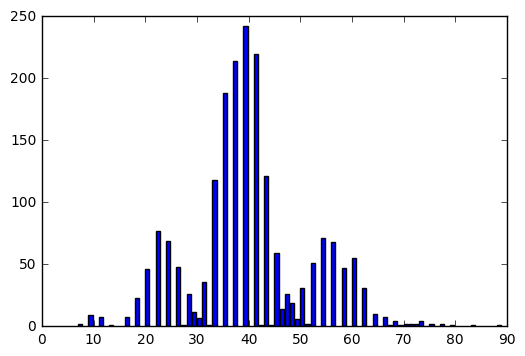

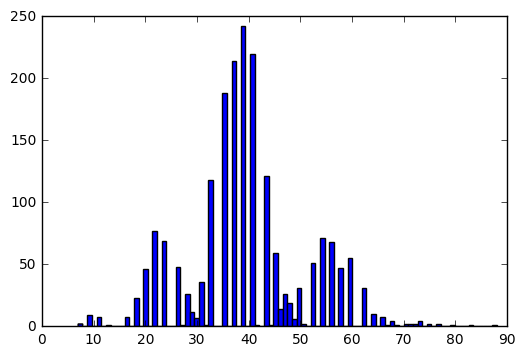

39.662500000000001

In [5]:
plt.bar(counts,freqs)
plt.show()
plt.hist(count_list,bins = 90)
plt.show()
np.average(count_list)

In [113]:
#ex17
import random
eta = 0.5
count_list = []
for j in range(2000):
    random.seed() #current system time is used, so guranteed every cycle has a different seed
    point_order = random.sample(range(N),N)
    w = np.zeros((1,n))
    nUpdate = 0 
    has_error = 1
    while(has_error):
        has_error = 0 # if no error in a full loop, this means all the points is separated well
        for i in point_order:
            if(y[i]*np.dot(w,x[i])<=0):
                w += eta*x[i]*y[i]
                nUpdate += 1
                has_error = 1
    count_list.append(nUpdate) #used for plt.hist

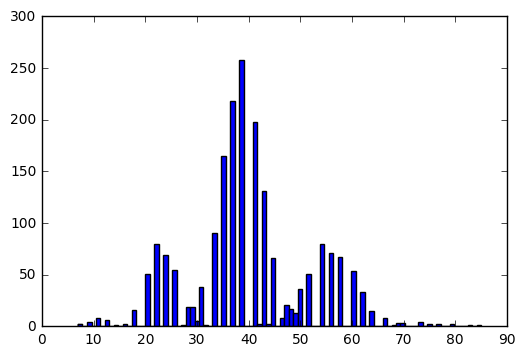

40.137500000000003

In [6]:
plt.hist(count_list,bins = 90)
plt.show()
np.average(count_list)

In [6]:
#check the average update number verses eta, the average update number is independent of the update speed
#ex17
import random
eta_list = []
for eta in np.arange(0.1,1.1,0.1):
    count_list = []
    for j in range(2000):
        random.seed() #current system time is used, so guranteed every cycle has a different seed
        point_order = random.sample(range(N),N)
        w = np.zeros((1,n))
        nUpdate = 0 
        has_error = 1
        while(has_error):
            has_error = 0 # if no error in a full loop, this means all the points is separated well
            for i in point_order:
                if(y[i]*np.dot(w,x[i])<=0):
                    w += eta*x[i]*y[i]
                    nUpdate += 1
                    has_error = 1
        count_list.append(nUpdate) #used for plt.hist
    eta_list.append(np.average(count_list))

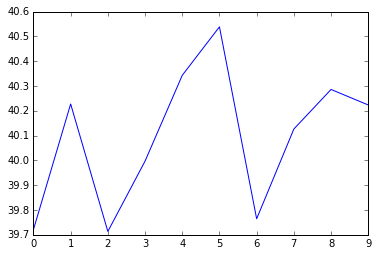

In [125]:
plt.plot(eta_list)
plt.show()